# Predicting Profits
### CourseraML: Homework #1

Coursera Course Link: https://www.coursera.org/learn/machine-learning/


##### Homework Description
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.



### Importing Raw Data and Libraries

The data has already been cleaned so we don't need to change it at all. However, the columns are not labeled within the set. Please note that the first column is the **city population** and the second column is the **profit**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datafile = "./data/ex1data1.txt"

In [7]:
data = pd.read_csv(datafile, header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 1. Plotting the Data

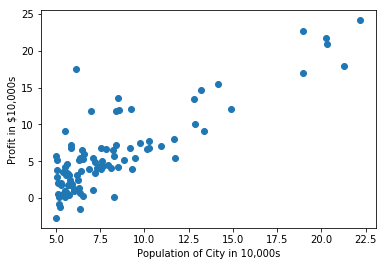

In [9]:
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### 2. Gradient Descent

Fitting the linear regression parameters θ to the dataset using gradient descent.

#### 2.1 Update Equations

The objective of linear regression is to minimize the cost function J(θ):
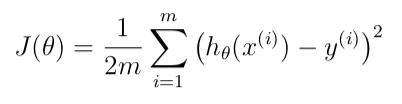

                                                                                                                       
where the hypothesis hθ(x) is given by the linear model:
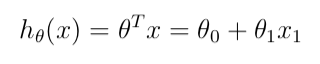

The parameters of the model are the θj values. These values are adjusted to minimize cost J(θ) through **gradient descent**.

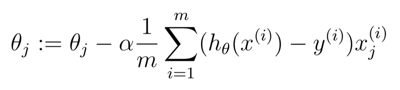

#### 2.2 Implementation

#### 2.3 Computing the cost J(θ)